In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

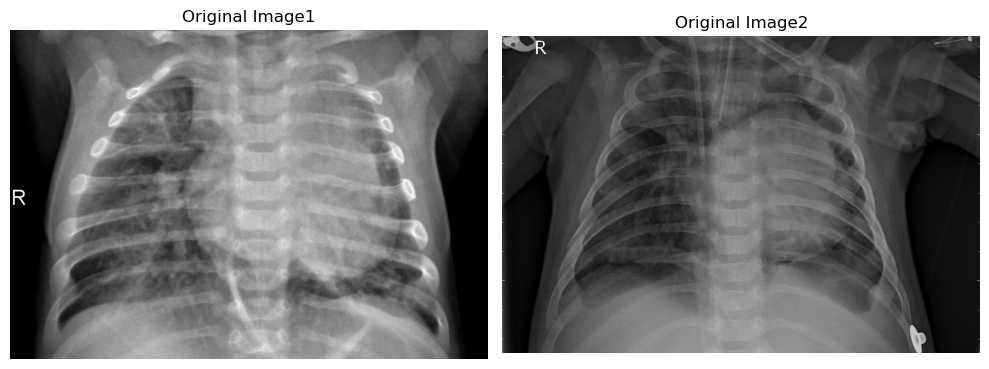

image 1 shape: (762, 1106)
image 2 shape: (680, 1024)


In [3]:
num_images = 2
dataset_path = 'chest_xray/test/PNEUMONIA'
im_names = [im for im in os.listdir(dataset_path) if im.endswith('.jpeg')]
img1 = cv2.imread(os.path.join(dataset_path, im_names[0]), cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title("Original Image1")
plt.axis('off')
img2 = cv2.imread(os.path.join(dataset_path, im_names[1]), cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title("Original Image2")
plt.axis('off')
plt.tight_layout()
plt.show()
print(f'image 1 shape: {img1.shape}')
print(f'image 2 shape: {img2.shape}')

Basic Enhancements

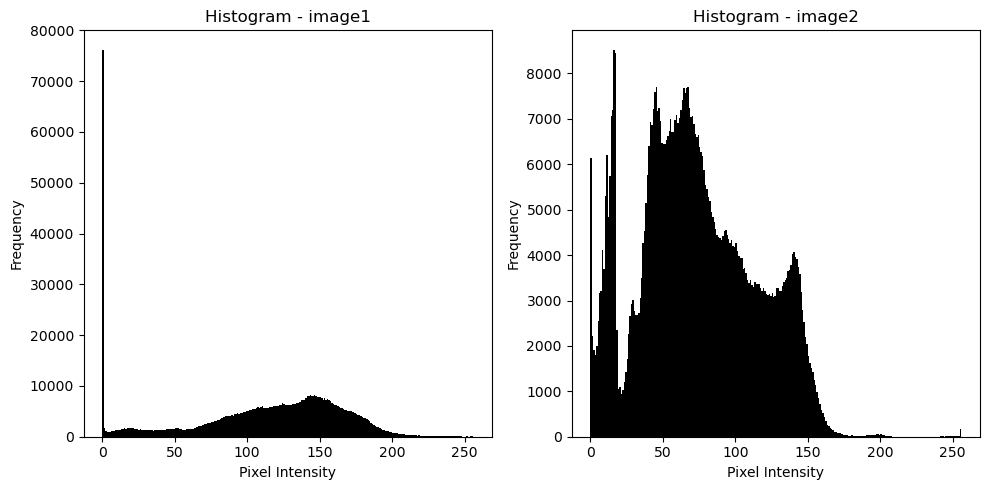

In [4]:
# image histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(img1.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histogram - image1")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
plt.hist(img2.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histogram - image2")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

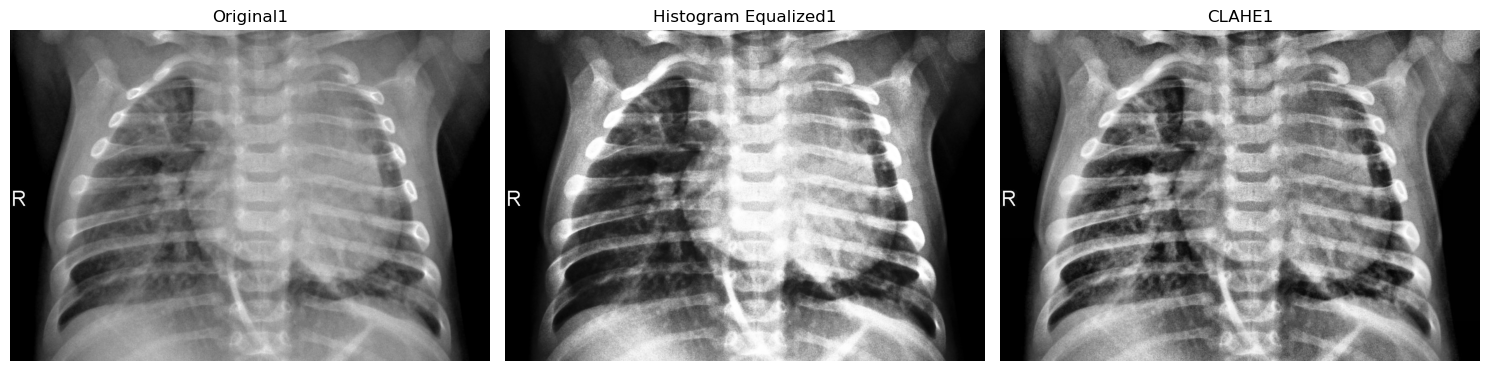

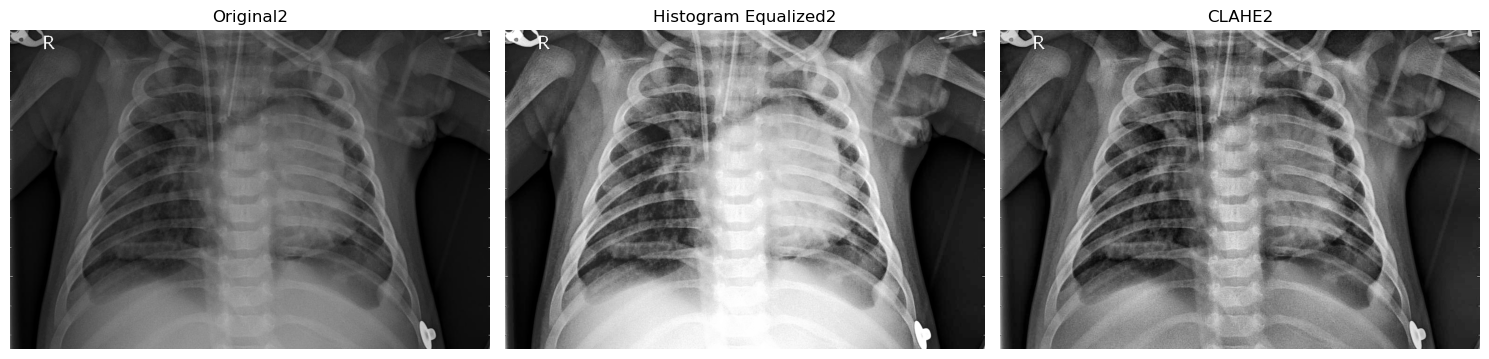

In [5]:
# histogram equalization

img_hist_eq1 = cv2.equalizeHist(img1)
img_hist_eq2 = cv2.equalizeHist(img2)
# 2. CLAHE (adaptive histogram equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_clahe1 = clahe.apply(img1)
img_clahe2 = clahe.apply(img2)

# Plot all three images after equalization
def plot_histequal(img, img_hist_eq, img_clahe, number):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Original{number}")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(img_hist_eq, cmap='gray')
    plt.title(f"Histogram Equalized{number}")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(img_clahe, cmap='gray')
    plt.title(f"CLAHE{number}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
plot_histequal(img1, img_hist_eq1, img_clahe1, 1)
plot_histequal(img2, img_hist_eq2, img_clahe2, 2)

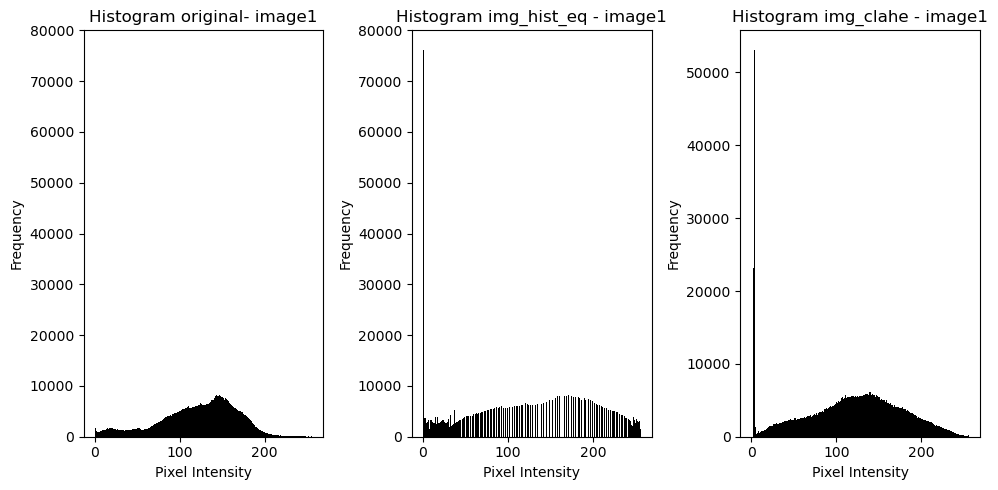

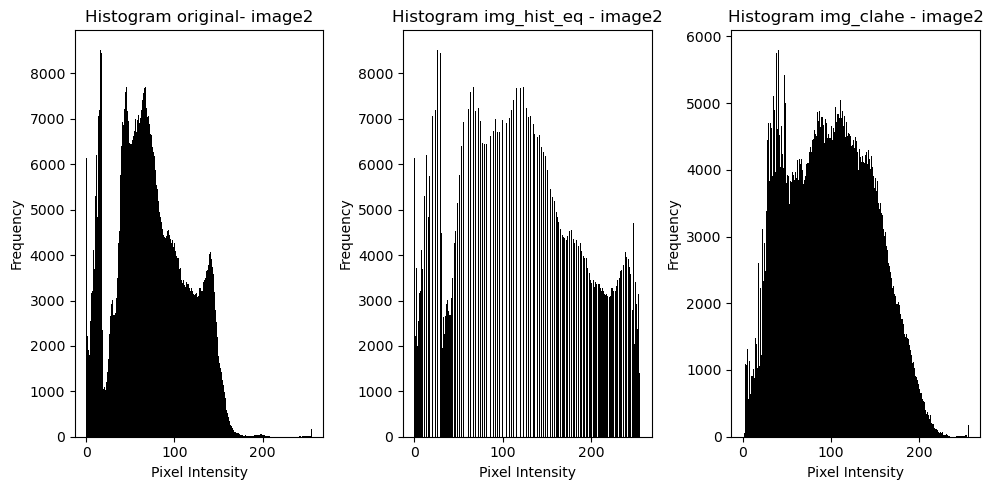

In [6]:
# image histogram
def plot_hists(img, img_hist_eq, img_clahe, number):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.hist(img.ravel(), bins=256, range=(0, 256), color='black')
    plt.title(f"Histogram original- image{number}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.subplot(1, 3, 2)
    plt.hist(img_hist_eq.ravel(), bins=256, range=(0, 256), color='black')
    plt.title(f"Histogram img_hist_eq - image{number}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.subplot(1, 3, 3)
    plt.hist(img_clahe.ravel(), bins=256, range=(0, 256), color='black')
    plt.title(f"Histogram img_clahe - image{number}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
plot_hists(img1, img_hist_eq1, img_clahe1, 1)
plot_hists(img2, img_hist_eq2, img_clahe2, 2)

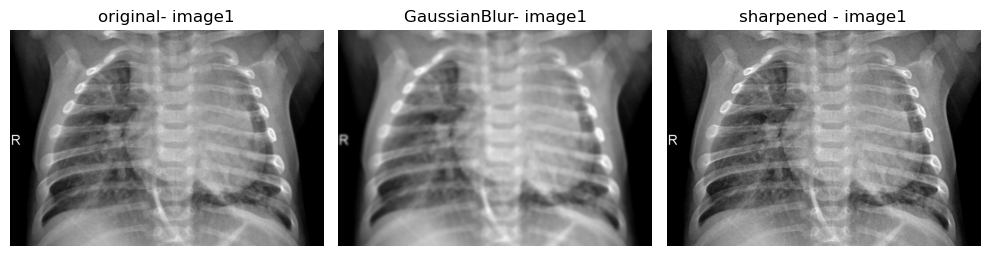

In [11]:
# b) Gaussian Blur + Sharpening

blurred = cv2.GaussianBlur(img1, (21, 21), 0)
sharpened = cv2.addWeighted(img1, 1.5, blurred, -0.5, 0)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title(f"original- image1")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title(f"GaussianBlur- image1")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(sharpened, cmap='gray')
plt.title(f"sharpened - image1")
plt.axis('off')
plt.tight_layout()
plt.show()

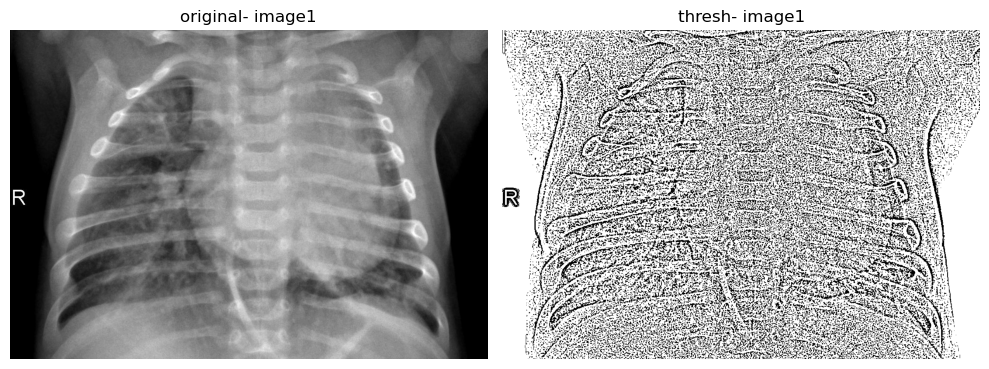

In [12]:
# c) Adaptive Thresholding

thresh = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title(f"original- image1")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title(f"thresh- image1")
plt.axis('off')
plt.tight_layout()
plt.show()

3. Morphological Operations

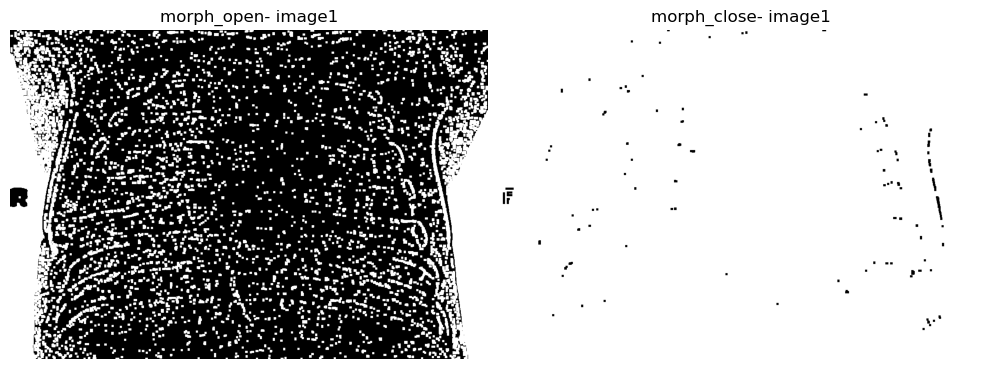

In [13]:
kernel = np.ones((5, 5), np.uint8)
morph_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
morph_close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(morph_open, cmap='gray')
plt.title(f"morph_open- image1")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(morph_close, cmap='gray')
plt.title(f"morph_close- image1")
plt.axis('off')
plt.tight_layout()
plt.show()

4. Edge Detection

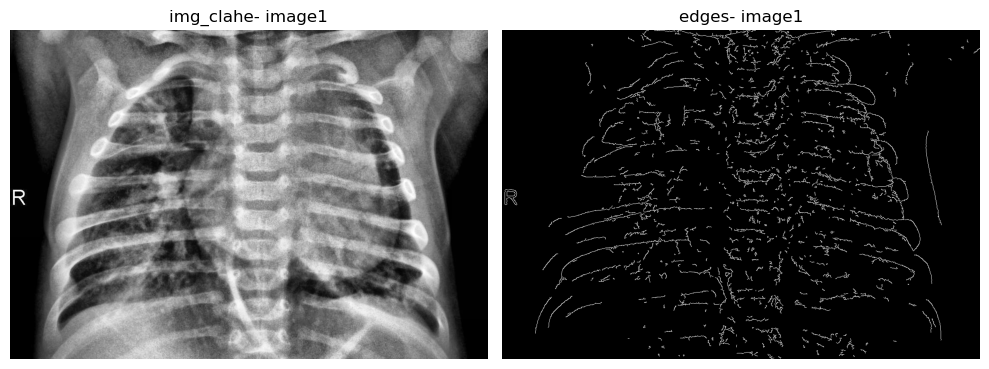

In [14]:
edges = cv2.Canny(img_clahe1, 100, 200)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_clahe1, cmap='gray')
plt.title(f"img_clahe- image1")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title(f"edges- image1")
plt.axis('off')
plt.tight_layout()
plt.show()

5. Geometric Transforms

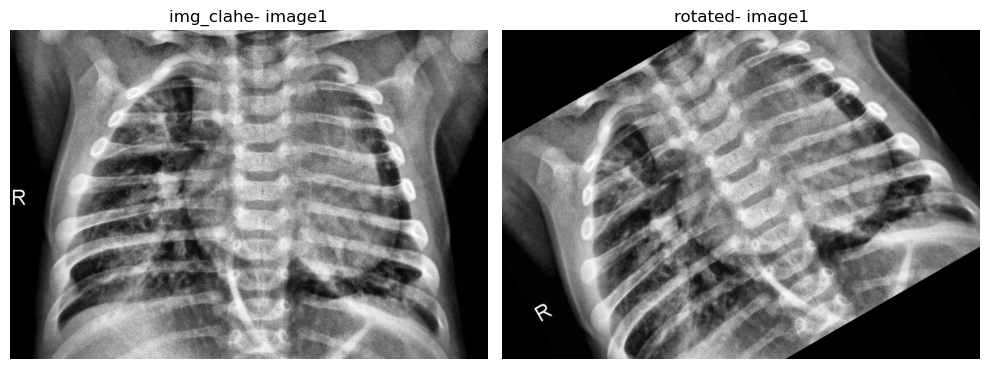

In [15]:
# a) Rotate Image

rows, cols = img_clahe1.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 1)
rotated = cv2.warpAffine(img_clahe1, M, (cols, rows))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_clahe1, cmap='gray')
plt.title(f"img_clahe- image1")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rotated, cmap='gray')
plt.title(f"rotated- image1")
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# b) Image Registration- register to align image2 to image1

from skimage.registration import phase_cross_correlation
from skimage.transform import warp_polar
from scipy.ndimage import rotate, shift


6. select ROI

In [16]:
# Select ROI manually from image
roi = cv2.selectROI("Select ROI", img1, showCrosshair=True)
x, y, w, h = roi
cropped = img1[y:y+h, x:x+w]

cv2.imshow("Cropped ROI", cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

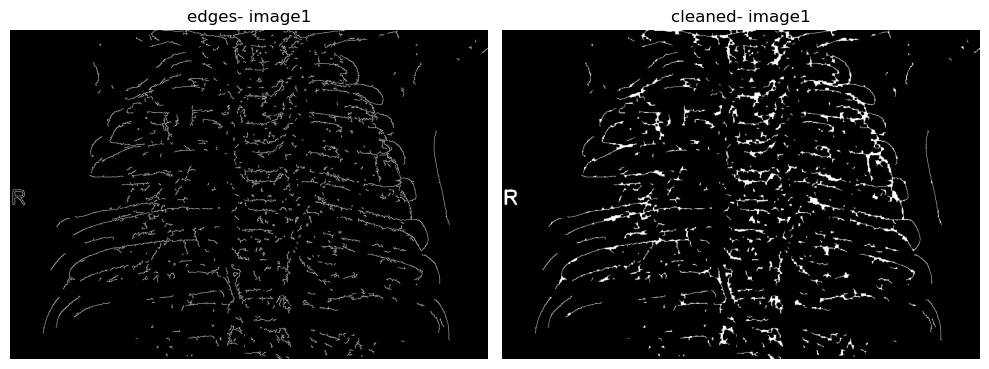

In [17]:
# Morphological operations
kernel = np.ones((5, 5), np.uint8)
cleaned = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title(f"edges- image1")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cleaned, cmap='gray')
plt.title(f"cleaned- image1")
plt.axis('off')
plt.tight_layout()
plt.show()


In [19]:
# Assume `image` is grayscale, and `binary_mask` is a thresholded image
contours, _ = cv2.findContours(img_clahe1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter and find the largest ROI contour
roi_contour = max(contours, key=cv2.contourArea)

# Draw mask
mask = np.zeros_like(img_clahe1)
cv2.drawContours(mask, [roi_contour], -1, 255, -1)

# Extract ROI
roi = cv2.bitwise_and(img_clahe1, img_clahe1, mask=mask)

# Optional: crop bounding box
x, y, w, h = cv2.boundingRect(roi_contour)
cropped = roi[y:y+h, x:x+w]

cv2.imshow("ROI", cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()
